<a href="https://colab.research.google.com/github/Lacikaki7/AI_project1/blob/main/11_convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN

28x28 = 784

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
transform = transforms.ToTensor()

In [ ]:
train_data = datasets.MNIST(root='./Data',train=True,download=True,transform=transform)
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data = datasets.MNIST(root='./Data',train=False,download=True,transform=transform)
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
train_data[0][1]

5

In [ ]:
train_data[0][0].shape

torch.Size([1, 28, 28])

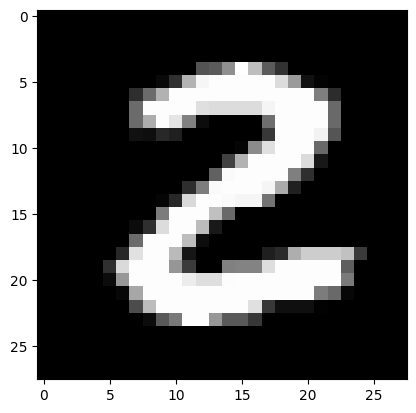

In [ ]:
plt.imshow(train_data[25][0].reshape((28,28)),cmap="gray")

In [ ]:
train_data[25][1]

2

In [ ]:
torch.manual_seed(101)

train_loader = DataLoader(train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(test_data,batch_size=100,shuffle=False)

In [ ]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f"{x:4}"))

In [ ]:
for images, labels in train_loader:
    break

In [ ]:
print("Labels: ",labels[:12])

Labels:  tensor([7, 2, 3, 5, 8, 5, 3, 6, 9, 9, 1, 3])


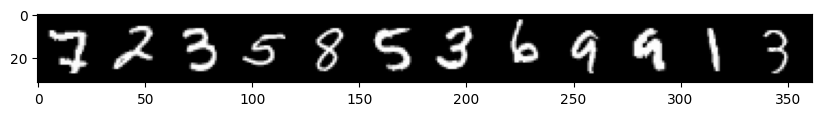

In [ ]:
im = make_grid(images[:12],nrow=12)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)));

In [ ]:
class Net(nn.Module):
    def __init__(self,in_s = 784, out_s = 10, layers = [120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_s,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_s)

    def forward(self,x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device) # Might as well find out!

cpu


In [ ]:
torch.manual_seed(101)
model = Net().to(device)
model

Net(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters()]
    print(sum(params))

In [ ]:
count_parameters(model)

105214


In [ ]:
import time

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    train_acc = 0.0
    train_num = 0
    train_loss = 0.0

    b = 0
    for X_train, y_train in train_loader:
        b+=1

        X_train = X_train.to(device)
        y_train = y_train.to(device)

        y_pred = model(X_train.view(32,-1))
        loss = criterion(y_pred, y_train)

        train_loss += loss.item()

        # which class
        predicted = torch.max(y_pred.data,1)[1]
        train_acc += (predicted == y_train).sum()
        train_num += 32

        # gradient calculating ---> update the weights
        optimizer.zero_grad()
        loss.backward() # gradient
        optimizer.step()

        # print results
        if b%125 == 0:
            print(f"[{i+1}/{epochs}] batch: [{b}/{len(train_loader)}] loss: {loss.item():.3f} acc: {train_acc.item()/train_num:.3f}")


    train_losses.append(train_loss)
    train_correct.append(train_acc.item()/train_num)

    # evaluating
    with torch.no_grad():
        b = 0
        test_acc = 0.0
        test_num = 0
        test_loss = 0.0
        for X_test, y_test in test_loader:
            b+=1

            X_test = X_test.to(device)
            y_test = y_test.to(device)
            y_pred = model(X_test.view(100,-1))
            test_num += 100

            predicted = torch.max(y_pred.data,1)[1]
            test_acc += (predicted == y_test).sum()

            loss = criterion(y_pred,y_test)
            test_loss += loss.item()

        test_losses.append(test_loss)

        print(f"\n[{i+1}/{epochs}] TL: {test_loss:.3f} TA: {test_acc/test_num:.3f}\n")


[1/10] batch: [125/1875] loss: 0.826 acc: 0.717
[1/10] batch: [250/1875] loss: 0.255 acc: 0.803
[1/10] batch: [375/1875] loss: 0.163 acc: 0.837
[1/10] batch: [500/1875] loss: 0.217 acc: 0.859
[1/10] batch: [625/1875] loss: 0.290 acc: 0.871
[1/10] batch: [750/1875] loss: 0.348 acc: 0.880
[1/10] batch: [875/1875] loss: 0.379 acc: 0.887
[1/10] batch: [1000/1875] loss: 0.081 acc: 0.893
[1/10] batch: [1125/1875] loss: 0.141 acc: 0.898
[1/10] batch: [1250/1875] loss: 0.535 acc: 0.902
[1/10] batch: [1375/1875] loss: 0.089 acc: 0.906
[1/10] batch: [1500/1875] loss: 0.087 acc: 0.909
[1/10] batch: [1625/1875] loss: 0.057 acc: 0.913
[1/10] batch: [1750/1875] loss: 0.054 acc: 0.915
[1/10] batch: [1875/1875] loss: 0.247 acc: 0.917

[1/10] TL: 14.202 TA: 0.958

[2/10] batch: [125/1875] loss: 0.063 acc: 0.959
[2/10] batch: [250/1875] loss: 0.179 acc: 0.960
[2/10] batch: [375/1875] loss: 0.034 acc: 0.960
[2/10] batch: [500/1875] loss: 0.026 acc: 0.960
[2/10] batch: [625/1875] loss: 0.093 acc: 0.961
[2

In [ ]:
a= [ 2.2, 3.3 ,4.4]
sum(a)

9.9

# Convnet

In [ ]:
conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3,stride=1)

In [ ]:
for X_train, y_train in train_data:
    break
for X_train, y_train in train_loader:
    break

In [ ]:
X_train.shape

torch.Size([32, 1, 28, 28])

In [ ]:
y_train

tensor([6, 7, 2, 1, 8, 9, 1, 4, 8, 6, 9, 8, 0, 2, 4, 8, 0, 6, 2, 6, 9, 7, 7, 9,
        4, 7, 5, 8, 9, 8, 8, 9])

In [ ]:
x = X_train.view(32,1,28,28)

In [ ]:
x.shape

torch.Size([32, 1, 28, 28])

In [ ]:
conv1(x).shape

torch.Size([32, 6, 26, 26])

In [ ]:
x = F.relu(conv1(x))

In [ ]:
x.shape

torch.Size([32, 6, 26, 26])

In [ ]:
x = F.avg_pool2d(x,2,2)

In [ ]:
x.shape

torch.Size([32, 6, 13, 13])

In [ ]:
conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=3,stride=1)

In [ ]:
x = conv2(x)

In [ ]:
x.shape

torch.Size([32, 16, 11, 11])

In [ ]:
x = F.avg_pool2d(x,2,2)

In [ ]:
x.shape

torch.Size([32, 16, 5, 5])

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3,stride=1)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=3,stride=1)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,x):
        batch_size = x.shape[0]

        x = self.conv1(x)
        x = F.relu(x)
        x = F.avg_pool2d(x,kernel_size=2,stride=2)

        x = self.conv2(x)
        x = F.relu(x)
        x = F.avg_pool2d(x,kernel_size=2,stride=2)

        #x = x.view(-1,5*5*16)
        x = x.view(batch_size,-1)

        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)

        return x


In [ ]:
torch.manual_seed(42)
model = ConvNet().to(device)

In [ ]:
model

ConvNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
count_parameters(model)

60074


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    train_acc = 0.0
    train_num = 0
    train_loss = 0.0

    b = 0
    for X_train, y_train in train_loader:
        b+=1

        X_train = X_train.to(device)
        y_train = y_train.to(device)

        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        train_loss += loss.item()

        # which class
        predicted = torch.max(y_pred.data,1)[1]
        train_acc += (predicted == y_train).sum()
        train_num += 32

        # gradient calculating ---> update the weights
        optimizer.zero_grad()
        loss.backward() # gradient
        optimizer.step()

        # print results
        if b%125 == 0:
            print(f"[{i+1}/{epochs}] batch: [{b}/{len(train_loader)}] loss: {loss.item():.3f} acc: {train_acc.item()/train_num:.3f}")


    train_losses.append(train_loss)
    train_correct.append(train_acc.item()/train_num)

    # evaluating
    with torch.no_grad():
        b = 0
        test_acc = 0.0
        test_num = 0
        test_loss = 0.0
        for X_test, y_test in test_loader:
            b+=1

            X_test = X_test.to(device)
            y_test = y_test.to(device)
            y_pred = model(X_test)
            test_num += 100

            predicted = torch.max(y_pred.data,1)[1]
            test_acc += (predicted == y_test).sum()

            loss = criterion(y_pred,y_test)
            test_loss += loss.item()

        test_losses.append(test_loss)

        print(f"\n[{i+1}/{epochs}] TL: {test_loss:.3f} TA: {test_acc/test_num:.3f}\n")


[1/10] batch: [125/1875] loss: 0.590 acc: 0.608
[1/10] batch: [250/1875] loss: 0.312 acc: 0.723
[1/10] batch: [375/1875] loss: 0.444 acc: 0.772
[1/10] batch: [500/1875] loss: 0.761 acc: 0.801
[1/10] batch: [625/1875] loss: 0.327 acc: 0.821
[1/10] batch: [750/1875] loss: 0.259 acc: 0.837
[1/10] batch: [875/1875] loss: 0.170 acc: 0.849
[1/10] batch: [1000/1875] loss: 0.067 acc: 0.859
[1/10] batch: [1125/1875] loss: 0.077 acc: 0.868
[1/10] batch: [1250/1875] loss: 0.200 acc: 0.875
[1/10] batch: [1375/1875] loss: 0.242 acc: 0.881
[1/10] batch: [1500/1875] loss: 0.049 acc: 0.887
[1/10] batch: [1625/1875] loss: 0.062 acc: 0.892
[1/10] batch: [1750/1875] loss: 0.021 acc: 0.897
[1/10] batch: [1875/1875] loss: 0.246 acc: 0.901

[1/10] TL: 10.258 TA: 0.968

[2/10] batch: [125/1875] loss: 0.156 acc: 0.959
[2/10] batch: [250/1875] loss: 0.419 acc: 0.962
[2/10] batch: [375/1875] loss: 0.071 acc: 0.963
[2/10] batch: [500/1875] loss: 0.109 acc: 0.964
[2/10] batch: [625/1875] loss: 0.142 acc: 0.965
[2